#### Nome: Ramon Oliveira de Azevedo
#### DRE: 120023419
#### 7° Período
#### Ciência da Computação

# Projeto de Introdução ao Aprendizado de Máquina - Professor João Carlos Pereira da Silva

# <center>Análise de Dados com Regressão Linear</center>

## Sumário

*   Apresentação do projeto e objetivo
*   A Base de Dados
*   Implementação
*   Referências Bibliográficas
*   Agradecimentos

### Implementação

##### Começando do básico, vamos importar as bibliotecas

In [12]:
import pandas as pd
import numpy as np
import sys
import scipy
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import iqr
from sklearn import linear_model
from sklearn.model_selection import train_test_split

##### Como esse trabalho servirá como portfólio pessoal, vale deixar explícito as versões que aqui serão trabalhadas:

In [13]:
print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Pandas: {}'.format(pd.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Scipy: 1.9.1
Pandas: 1.4.4
NumPy: 1.21.5


##### Dando início, iremos transformar a nossa database, que é um arquivo CSV, em um objeto do tipo dataframe, utilizando a biblioteca Pandas.

In [14]:
#Fazer a função de cálculo de RSS aqui
def calculateRSS(y, y_pred):
    sumRss = [(pivot[0] - pivot[1]) ** 2 for pivot in zip(y, y_pred)]
    rss = np.sum(sumRss)
    return rss

In [15]:
#Fazer a função de cálculo de RSE aqui
def calculateRSE(rss, y):
    rse = math.sqrt(np.sum(rss) / (len(y) - 2))
    return rse

In [16]:
def calculateSumForSETs(X):
    print(X)
    sum = 0
    for i in  range (0, len(X)):
        sum += X[i]
    return sum

In [17]:
#Fazer a função de cálculo de SETheta0 aqui
"""
def calculateSETheta0(X):
    average = np.mean(X)
    variance = np.std(X) ** 2
    sum = [(pivot[0] - pivot[1]) ** 2 for pivot in zip(float(X), average)]
    parcial = variance / sum
    return Math.sqrt(parcial)
"""

"""
def calculateSETheta0(X, rse):
    rse_square = rse ** 2
    average = np.mean(X)
    sum = calculateSumForSETs(X)
    var = rse_square * (1 / sum)
    return Math.sqrt(var)
"""

def calculateSETheta0(X, rse):
    sum = calculateSumForSETs(X)
    var = (rse ** 2) * ((1/len(X)) + ())

In [18]:
#def calculateTheta1():

In [19]:
def dataPreProcessing(pivot_test):
    #boxplot = X_test.boxplot
    #print('Quantidade de linhas no original: ', len(pivot_test))

    # Remover linhas com NaN
    pivot_test = pivot_test.dropna(axis = 0)

    # Remover colunas com NaN
    #pivot_test = pivot_test.dropna(axis = 1)

    #print('Quantidade de linhas com exclusão NaN: ', len(pivot_test))
    

    # Média Simples
    mediaSimples = np.mean(pivot_test, axis = 0)

    #Mediana
    medianaNotas = np.median(pivot_test)

    # Moda
    moda = stats.mode(pivot_test, keepdims=True)

    #print('Média Simples: ', mediaSimples)
    #print('Mediana: ', medianaNotas)
    #print('Moda - Elemento: ', moda[0][0])
    #print('Moda - Frequência: ', moda[1][0])

    Q1numpy = np.percentile(pivot_test, 25)
    Q2numpy = np.percentile(pivot_test, 50)
    Q3numpy = np.percentile(pivot_test, 75)

    #print('Primeiro quartil: ', Q1numpy)
    #print('Segundo quartil: ', Q2numpy)
    #print('Terceiro quartil: ', Q3numpy)

    IQR = iqr(pivot_test)

    #print('IQR: ', iqr(pivot_test))

    #print("\n\n\n")

    #boxplot = pivot_test.boxplot(column=['newspaper'])
    #plt.rc('figure', max_open_warning = 1000)
    #plt.figure()
    pivot_test.hist(column=['newspaper'])
    #print(pivot_test.hist(column=['newspaper']))
    #plt.show()
    #plt.clf()


In [20]:
def returnsInformations(df):
    X, y = df.iloc[:, :-1], df.iloc[:, -1]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70)

    dataPreProcessing(X_test)
    #dataPreProcessing(y_train)
    #print("Banana 1")
    reg = linear_model.LinearRegression()

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    coefficient = reg.coef_[0]
    intercept = reg.intercept_
    equationFirstVariable = reg.coef_[0]
    equationSecondVariable = reg.intercept_
    rss = calculateRSS(y, y_pred)
    rse = calculateRSE(rss, y)
    #theta0 = calculateSETheta0(X_train, rse)
    #equationFirstVariable = 0
    #equationSecondVariable = 0
    #rss = 0
    print(X_train)
    #rse = 0
    theta0 = 0
    theta1 = 0
    rSquared = reg.score(X, y)

    return coefficient, intercept, equationFirstVariable, equationSecondVariable, rss, rse, theta0, theta1, rSquared

In [21]:
def fillDataframe(df):
    rows = []
    for i in range (0, 30):
        rows.append(returnsInformations(df))
    df = pd.DataFrame(rows, columns=['Coefficient', 'Intercept', 'Equation First Variable', 'Equation Second Variable', 'RSS', 'RSE', 'SE theta0', 'SE theta1', 'rSquared'])
    return df

c:\Users\ramon\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


,Coefficient,Intercept,Equation First Variable,Equation Second Variable,RSS,RSE,SE theta0,SE theta1,rSquared
0,0.051039,1.784998,0.051039,1.784998,8043.735100,6.373768,0,0,0.884652
1,0.047257,3.038769,0.047257,3.038769,7264.282172,6.057086,0,0,0.892533
2,0.049564,2.092629,0.049564,2.092629,8085.055657,6.390118,0,0,0.892146
3,0.043298,3.130672,0.043298,3.130672,6474.870627,5.718511,0,0,0.895362
4,0.046000,3.000198,0.046000,3.000198,6576.267104,5.763113,0,0,0.890746
5,0.038939,3.804613,0.038939,3.804613,6994.007894,5.943338,0,0,0.882545
6,0.049617,1.477030,0.049617,1.477030,8873.205861,6.694339,0,0,0.872340
7,0.045832,2.562908,0.045832,2.562908,7077.072204,5.978527,0,0,0.891204
8,0.048507,2.148444,0.048507,2.148444,5794.283099,5.409626,0,0,0.883042
9,0.046662,3.324343,0.046662,3.324343,7889.905570,6.312528,0,0,0.893583


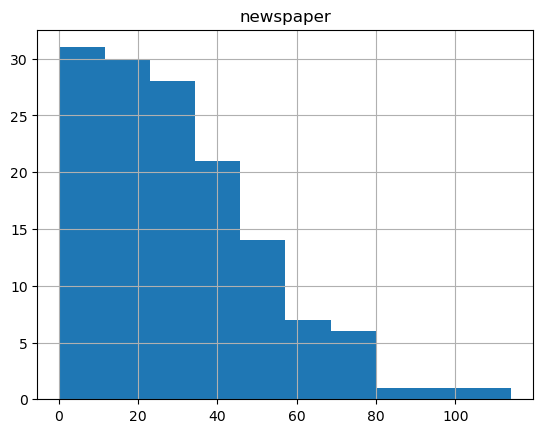

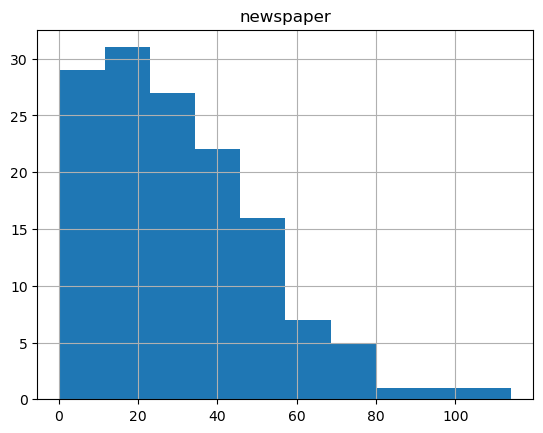

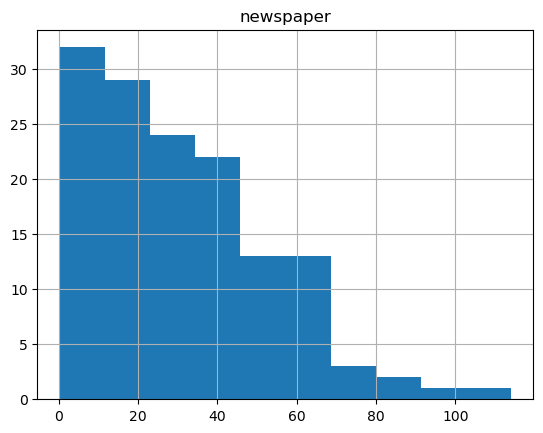

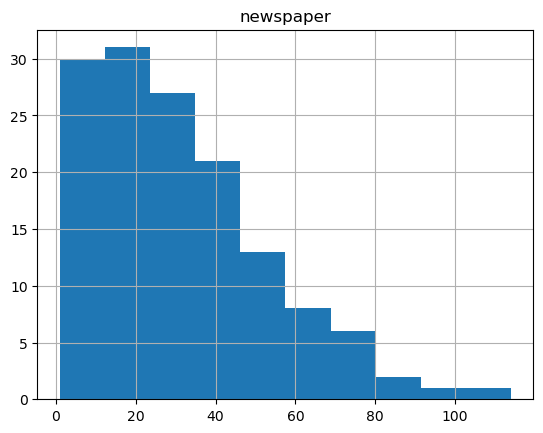

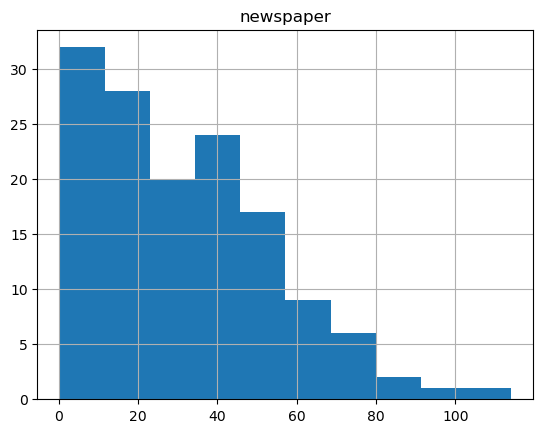

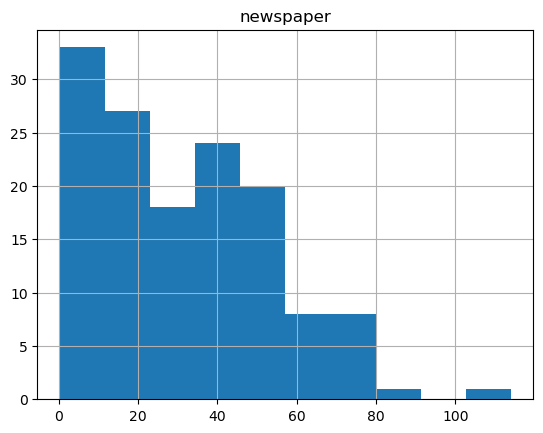

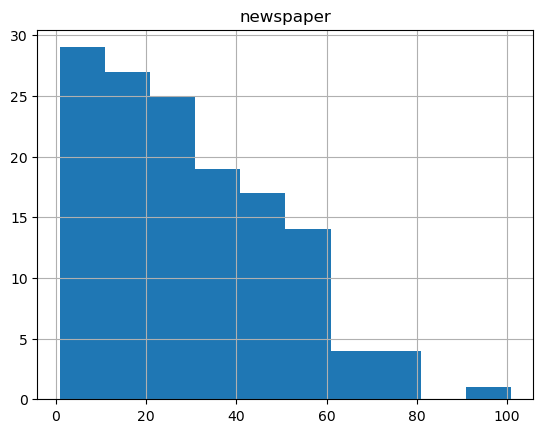

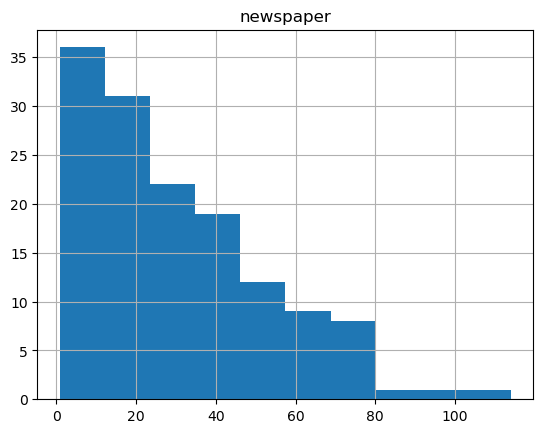

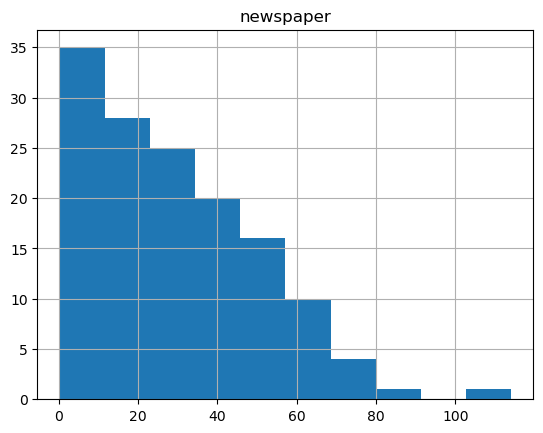

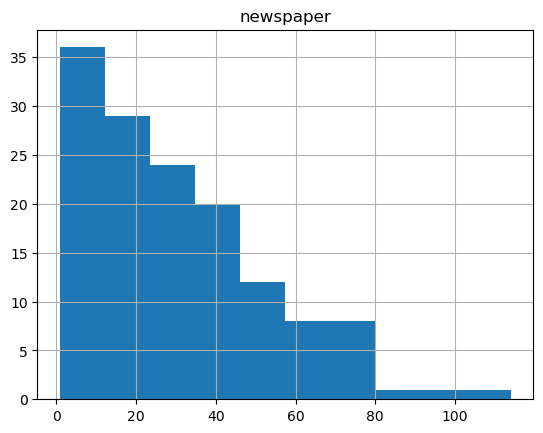

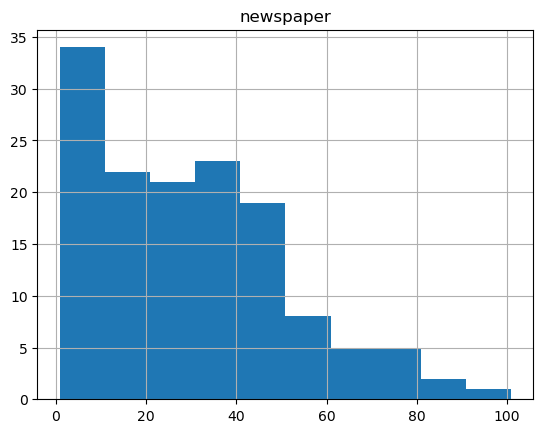

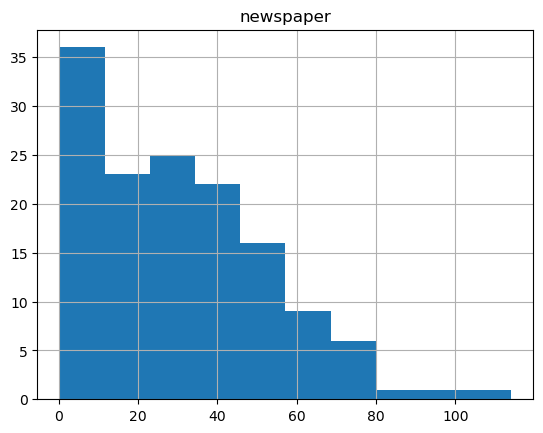

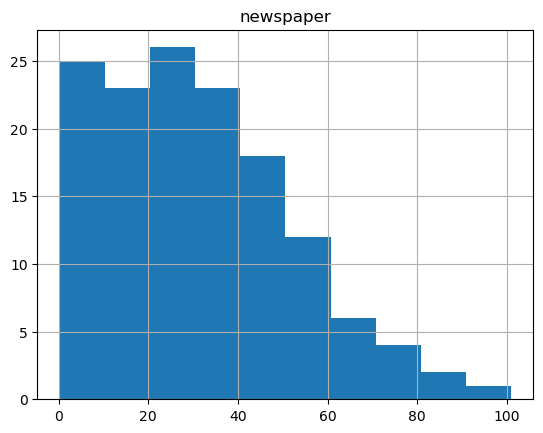

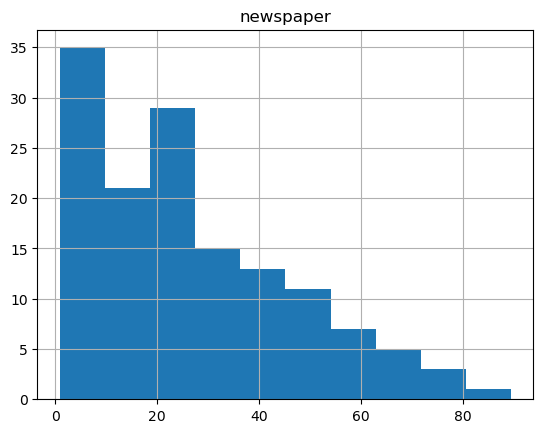

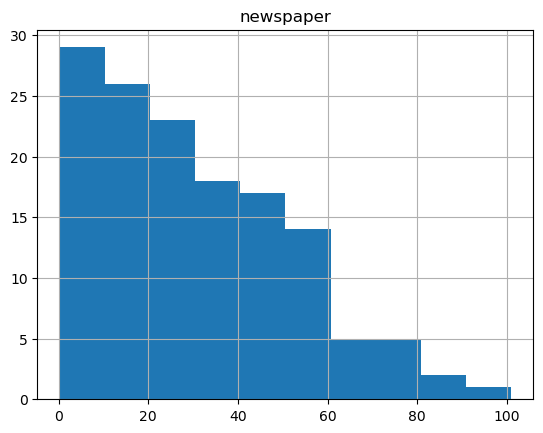

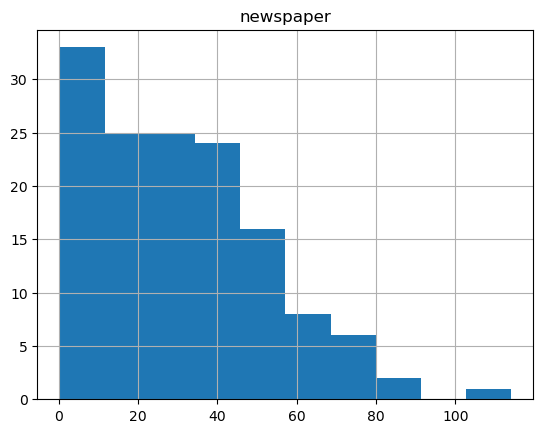

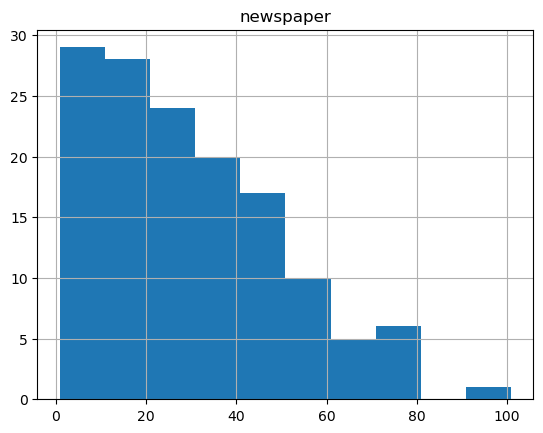

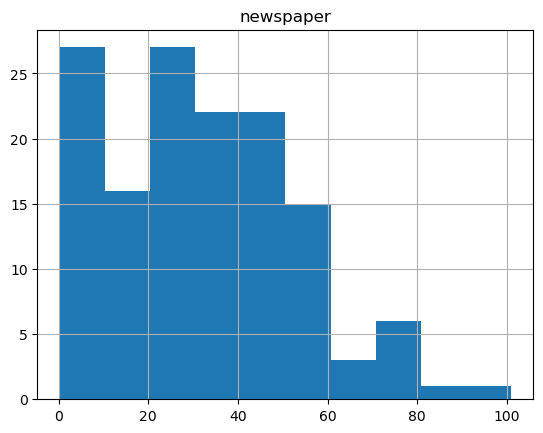

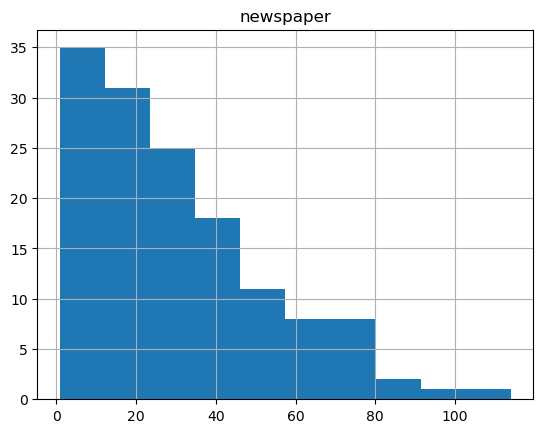

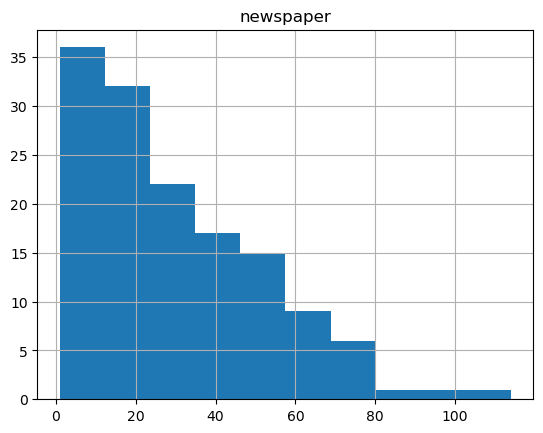

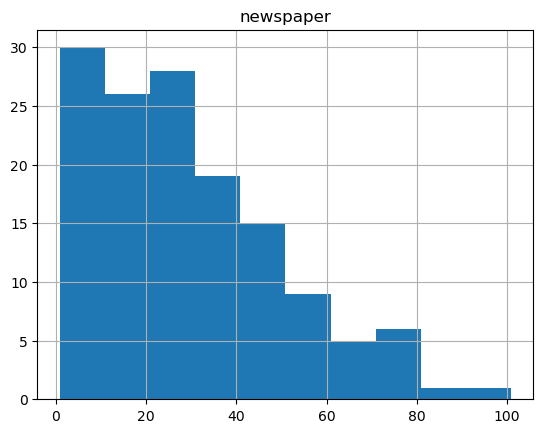

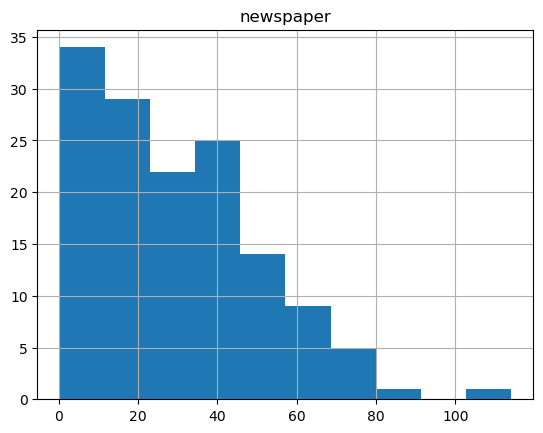

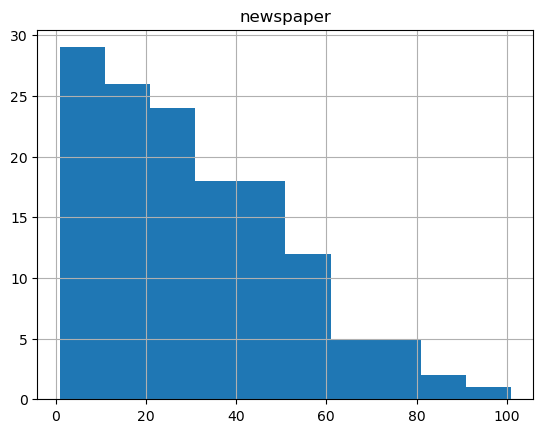

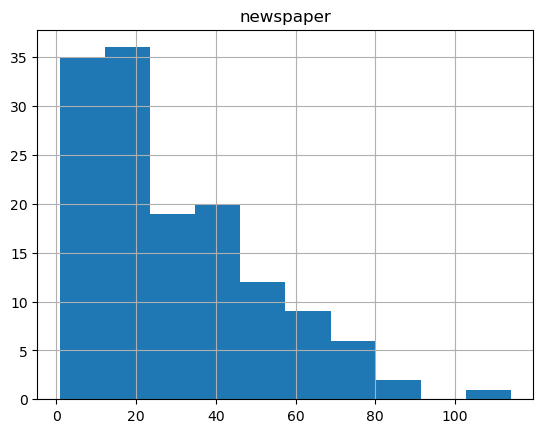

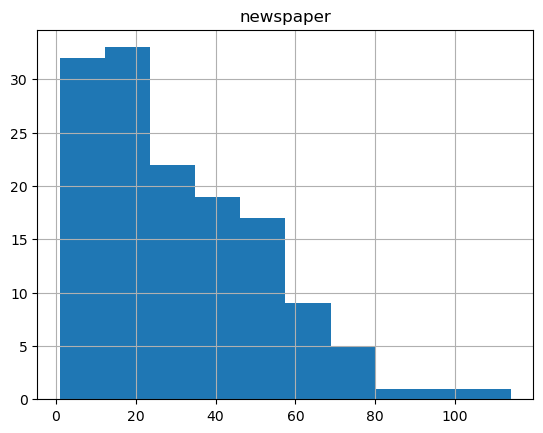

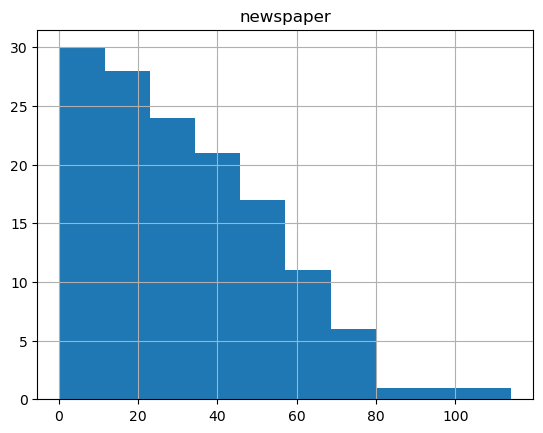

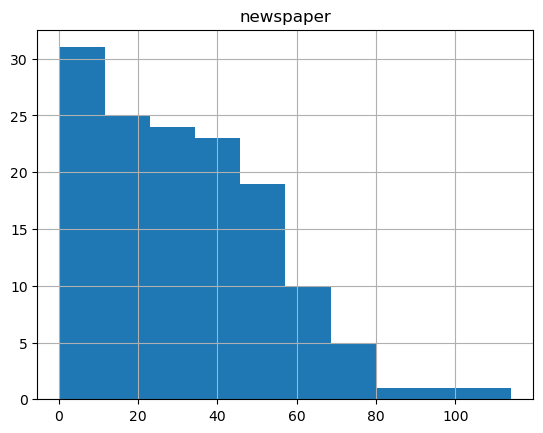

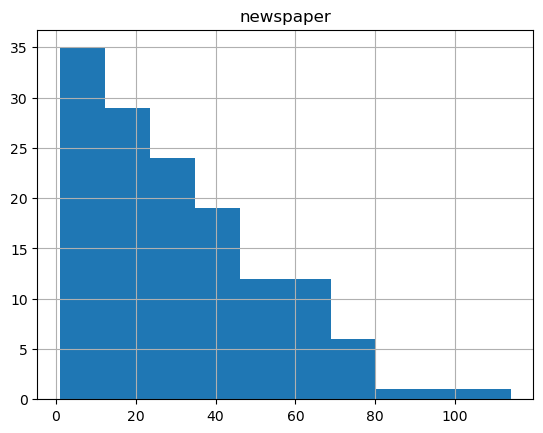

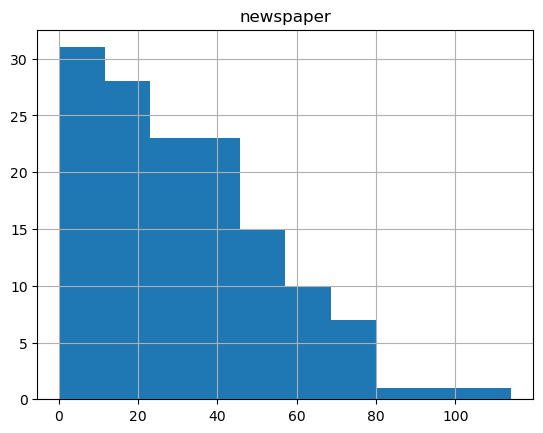

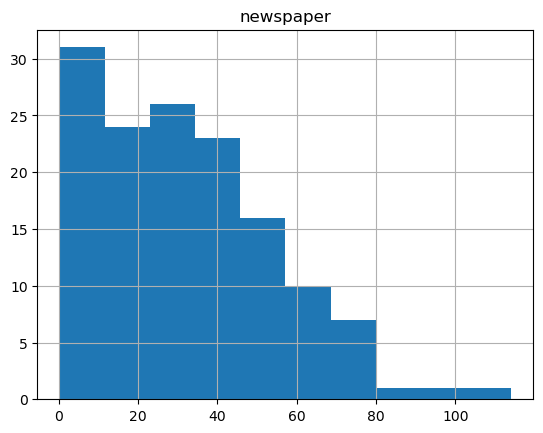

In [22]:
df = pd.read_csv('Advertising.csv', on_bad_lines='skip')
#print(fillDataframe(df))
fillDataframe(df)

In [23]:
#Fazer a função de cálculo de SETheta0 aqui
def calculateSETheta0(X):
    average = np.mean(X)
    variance = np.std(X) ** 2
    sum = [(pivot[0] - pivot[1]) ** 2 for pivot in zip(X, average)]

In [24]:
#Fazer a função de cálculo de SETheta1 aqui